# Batch effect analysis

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.metrics import confusion_matrix
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mutual_info_score
from scipy.stats import entropy
import seaborn as sns

In [2]:
adata=sc.read("brain.h5ad")

In [3]:
sc.set_figure_params(dpi_save=300)

In [4]:
res=['0.1','0.15','0.2','0.25','0.3','0.35','0.4','0.45','0.5','0.55','0.6','0.65','0.7','0.75','0.8']

In [5]:
adata

AnnData object with n_obs × n_vars = 131239 × 2000 
    obs: 'cellname', 'sample', 'groupid', 'n_genes', 'percent_mito', 'n_counts', 'n_genes_e', 'n_counts_e', 'desc_0.1', 'desc_0.15', 'desc_0.2', 'desc_0.25', 'desc_0.3', 'desc_0.35', 'desc_0.4', 'desc_0.45', 'desc_0.5', 'desc_0.55', 'desc_0.6', 'desc_0.65', 'desc_0.7', 'desc_0.75', 'desc_0.8', 'sampleID', 'maxprob', 'celltype_0.2', 'celltype_0.4', 'celltype_0.6', 'celltype_0.8', 'celltype_0.1', 'celltype_0.15', 'celltype_0.25', 'celltype_0.3', 'celltype_0.35', 'celltype_0.45', 'celltype_0.5', 'celltype_0.55', 'celltype_0.65', 'celltype_0.7', 'celltype_0.75', 'final_celltype'
    var: 'Ensembl', 'genename', 'n_cells', 'means', 'dispersions', 'dispersions_norm'
    uns: 'ProjectName', 'desc_0.15_colors', 'desc_0.1_colors', 'desc_0.2_colors', 'desc_0.4_colors', 'desc_0.6_colors', 'desc_0.8_colors', 'final_celltype_colors', 'prob_matrix0.1', 'prob_matrix0.15', 'prob_matrix0.2', 'prob_matrix0.25', 'prob_matrix0.3', 'prob_matrix0.35', 'prob

In [6]:
selected_index=adata.obs.sample(n=100, random_state=None).index

In [7]:
k=[100,200,300,400,500,1000,2000,3000,4000,5000]

scores=[]
for kk in k:
    neigh=NearestNeighbors(n_neighbors=kk+1)
    neigh.fit(adata.obsm['X_Embeded_z0.15'])
    neighbors_100=neigh.kneighbors(adata[selected_index].obsm['X_Embeded_z0.15'],return_distance=False)

    alltab=adata.obs['sampleID'].value_counts().sort_index()
    alltab=alltab/alltab.sum(axis=0)

    kl_score=[]
    for i in range(100):
        tab=adata.obs.iloc[neighbors_100[i][1:(kk+1)]]['sampleID'].value_counts().sort_index()/kk
        kl_score.append(entropy(tab,qk=alltab))
    scores.append(kl_score)

In [9]:
#k=[100,200,300,400,500,1000,2000,3000,4000,5000]

scores_d=[]
for kk in k:
    neigh=NearestNeighbors(n_neighbors=kk+1)
    neigh.fit(adata.X)
    neighbors_100=neigh.kneighbors(adata[selected_index].X,return_distance=False)

    alltab=adata.obs['sampleID'].value_counts().sort_index()
    alltab=alltab/alltab.sum(axis=0)

    kl_score=[]
    for i in range(100):
        tab=adata.obs.iloc[neighbors_100[i][1:(kk+1)]]['sampleID'].value_counts().sort_index()/kk
        kl_score.append(entropy(tab,qk=alltab))
    scores_d.append(kl_score)

In [12]:
pd_scores=pd.DataFrame(columns=['k','embeding'])
for i in range(len(k)):
        a=pd.DataFrame(data=scores[i],columns=['embeding'])
        a['k']=k[i]
        pd_scores=pd_scores.append(a,ignore_index=True)

C:\Users\wangk\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [13]:
pd_scores_d=pd.DataFrame(columns=['k','org'])
for i in range(len(k)):
        a=pd.DataFrame(data=scores_d[i],columns=['org'])
        a['k']=k[i]
        pd_scores_d=pd_scores_d.append(a,ignore_index=True)

In [14]:
pd_scores['orginal']=pd_scores_d['org']

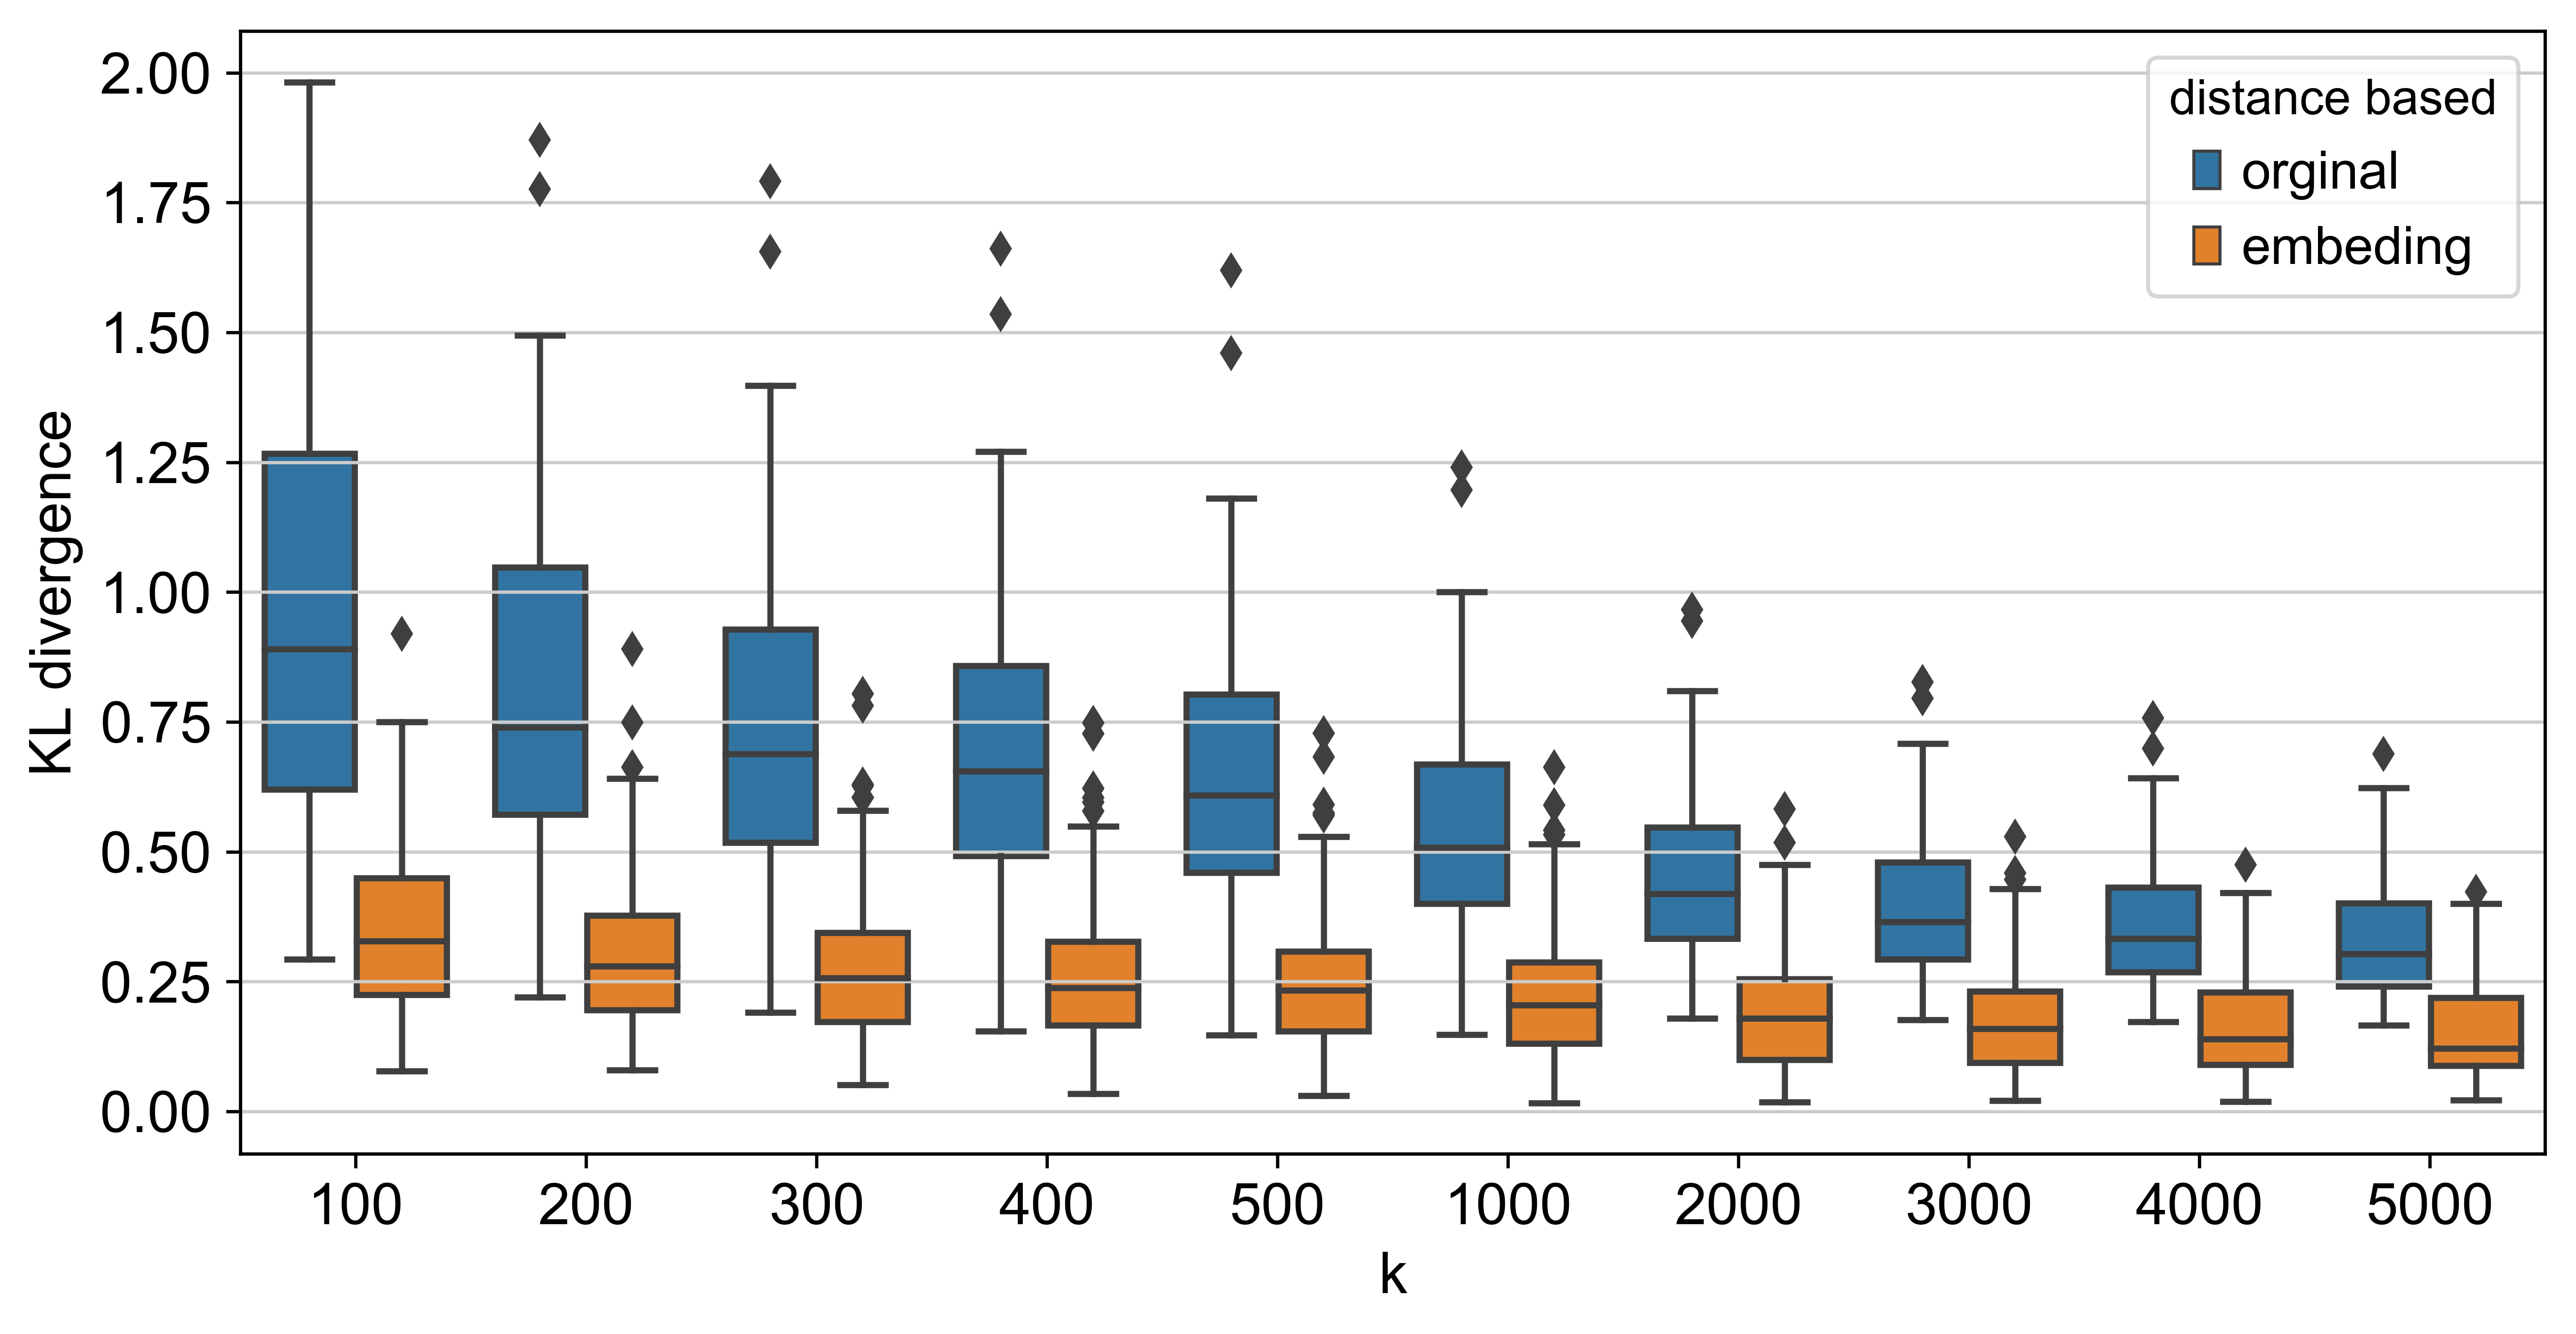

In [15]:
fig,ax=plt.subplots(figsize=[10,5],dpi=300)
dd=pd.melt(pd_scores,id_vars=['k'],value_vars=['orginal','embeding'],var_name='distance based',value_name='KL divergence')
ax=sns.boxplot(x='k',y='KL divergence',data=dd,hue='distance based')


In [16]:
#k=[100,200,300,400,500,1000,2000,3000,4000,5000]

scores_r=[]
kk=100
alltab=adata.obs['sampleID'].value_counts().sort_index()
alltab=alltab/alltab.sum(axis=0)

for ires in res:
    neigh=NearestNeighbors(n_neighbors=kk+1)
    neigh.fit(adata.obsm['X_Embeded_z'+ires])
    neighbors_100=neigh.kneighbors(adata[selected_index].obsm['X_Embeded_z'+ires],return_distance=False)


    kl_score=[]
    for i in range(100):
        tab=adata.obs.iloc[neighbors_100[i][1:(kk+1)]]['sampleID'].value_counts().sort_index()/kk
        kl_score.append(entropy(tab,qk=alltab))
    scores_r.append(kl_score)

In [17]:
pd_scores_r=[]
pd_scores_r=pd.DataFrame(columns=['resolution','KL divergence'])
for i in range(len(res)):
        a=pd.DataFrame(data=scores_r[i],columns=['KL divergence'])
        a['resolution']=res[i]
        pd_scores_r=pd_scores_r.append(a,ignore_index=True)

C:\Users\wangk\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


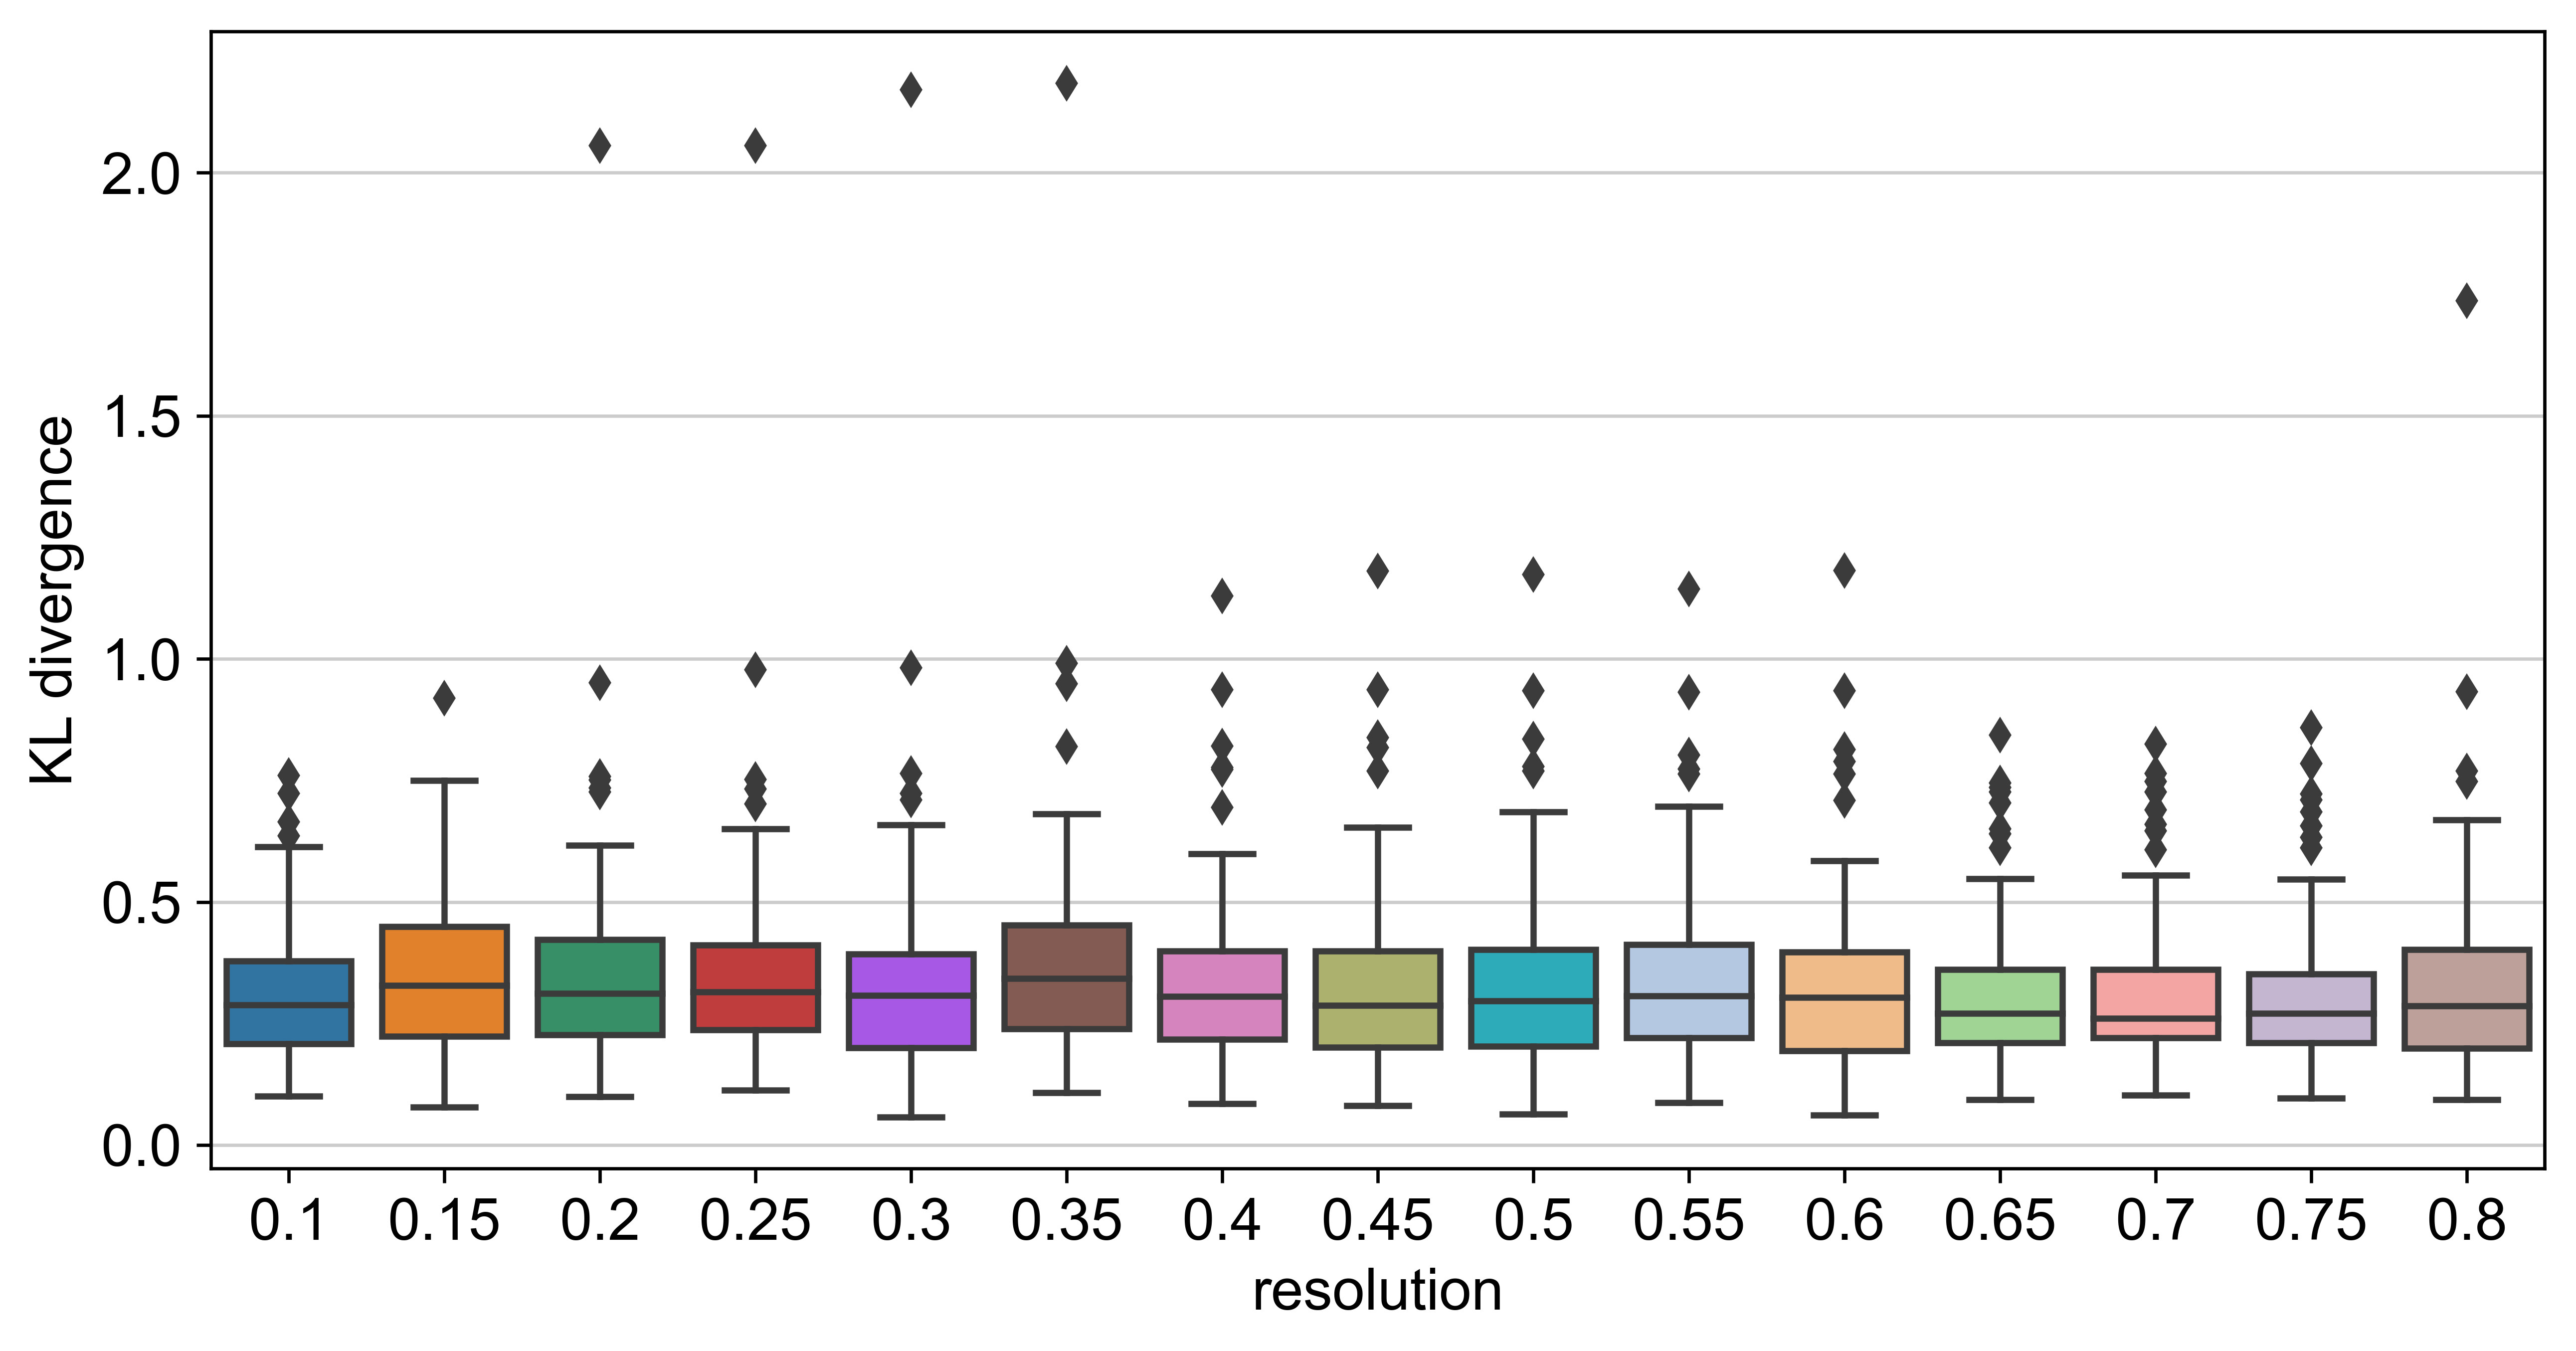

In [18]:
fig,ax=plt.subplots(figsize=[10,5],dpi=300)
ax=sns.boxplot(x='resolution',y='KL divergence',data=pd_scores_r)